<h1>EDA</h1>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


C:\Users\Aditya bhoir\AppData\Local\Temp\ipykernel_17352\1826118786.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.shape

(500, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
df = df.drop(['Email','Address','Avatar'],axis=1)

In [10]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


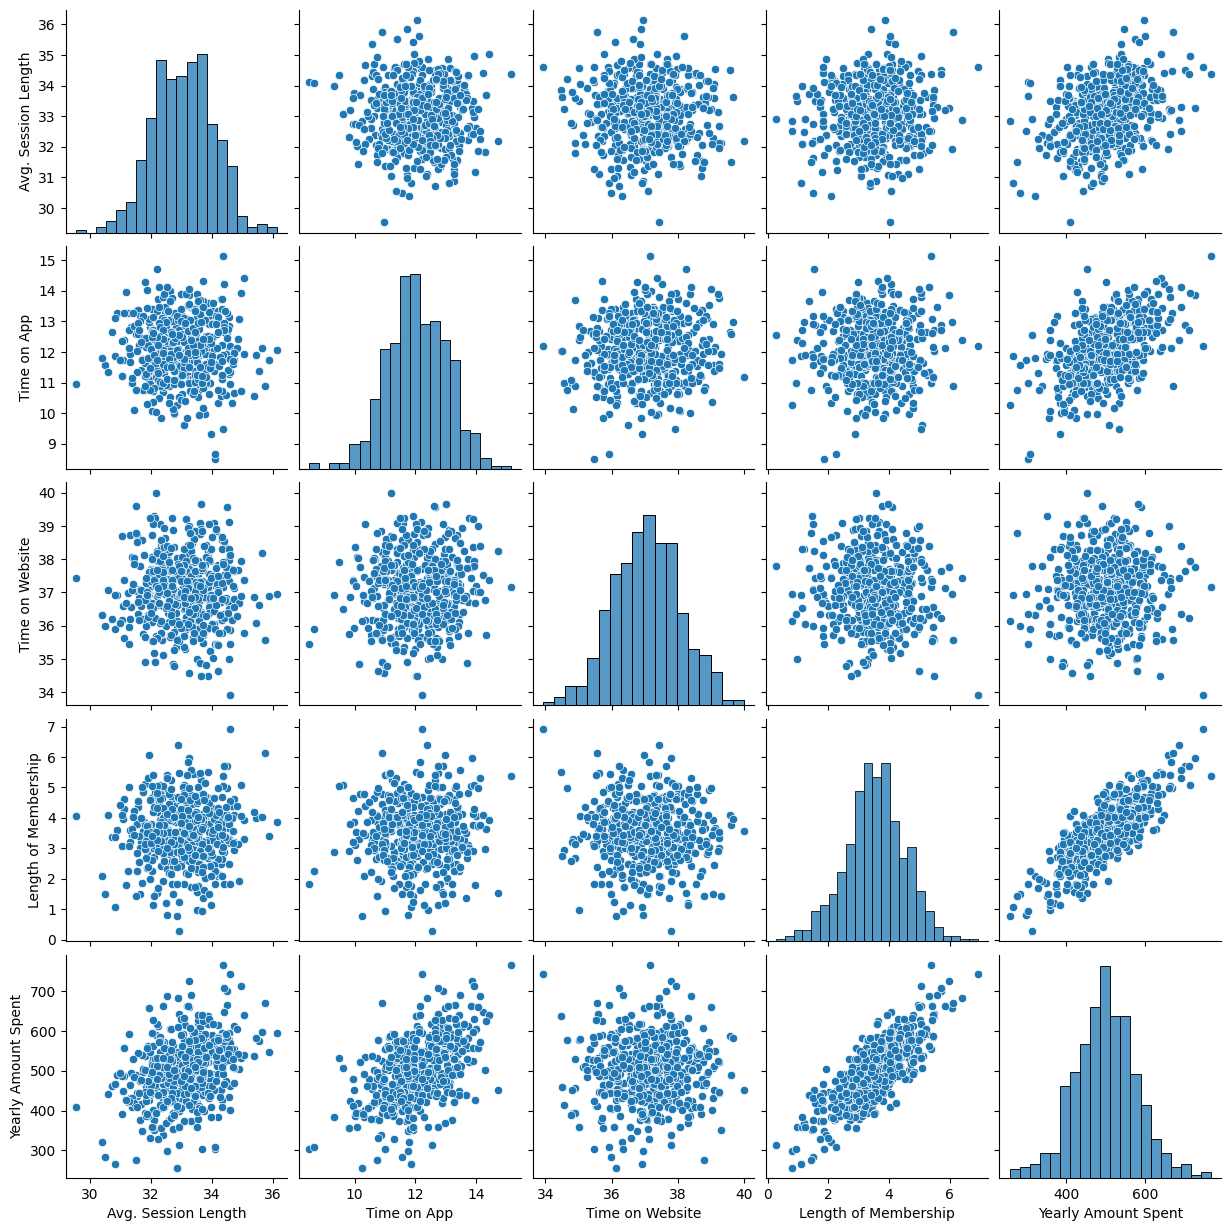

In [11]:
sns.pairplot(df)

In [12]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Axes: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

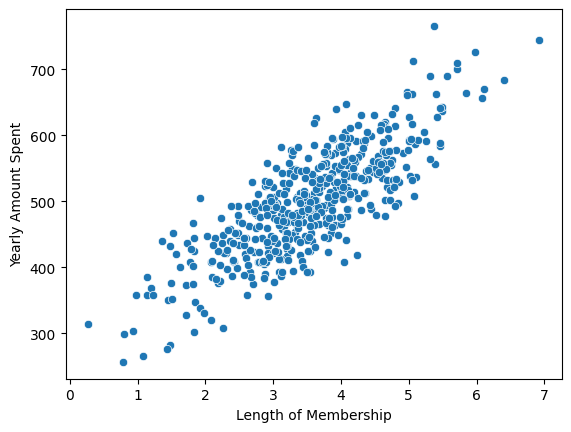

In [13]:
sns.scatterplot(data=df,x='Length of Membership',y='Yearly Amount Spent')

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

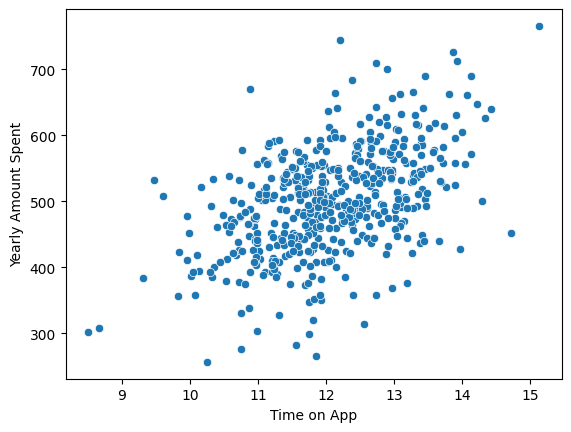

In [14]:
sns.scatterplot(data=df,x='Time on App',y='Yearly Amount Spent')

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

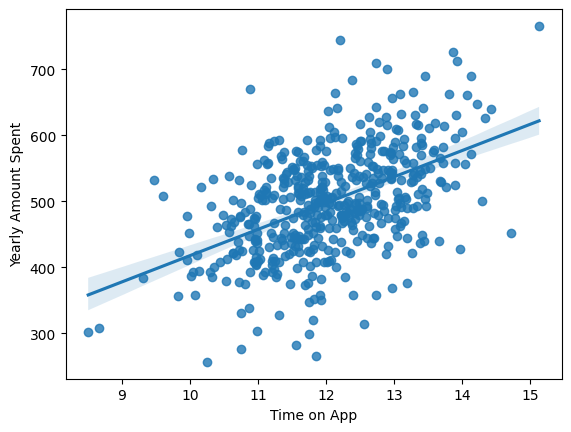

In [15]:
sns.regplot(data=df,x='Time on App',y='Yearly Amount Spent')

<Axes: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

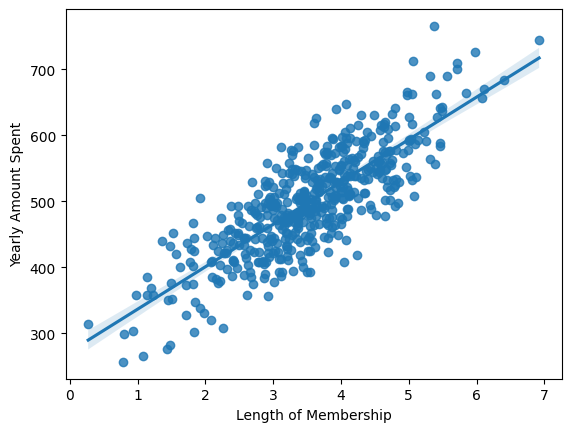

In [16]:
sns.regplot(data=df,x='Length of Membership',y='Yearly Amount Spent')

<h1>Extracting and splitting the main features and targets</h1>

In [17]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<h1>Linear Regression</h1>

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test)

In [22]:
lr.predict(sc.transform([[34.49,12.65,39.57,4.08]]))

c:\Users\Aditya bhoir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([596.49817401])

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_pred,y_test)
print(f'Mean Squared Error for multiple linear regression model\n{mse}')

Mean Squared Error for multiple linear regression model
274.97518594672044


In [24]:
mae = mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error for multiple linear regression model\n{mae}')

Mean Absolute Error for multiple linear regression model
13.382981058700786


In [25]:
lr_r2 = r2_score(y_test,y_pred)
print(f'R2 score for multiple linear regression model\n{lr_r2}')

R2 score for multiple linear regression model
0.9575066937968272


<h1>Lasso Regression</h1>

In [26]:
from sklearn.linear_model import Lasso

lo = Lasso()
lo.fit(x_train,y_train)

Lasso()

In [27]:
lo_pred = lo.predict(x_test)

In [28]:
lo_mse = mean_squared_error(y_test,lo_pred)
lo_mse

293.82883351531103

In [29]:
lo_r2 = r2_score(y_test,lo_pred)

print(f'R2 score for Lasso regression model\n{lo_r2}')

R2 score for Lasso regression model
0.9545931442835484


<h1>Gradient Boost Regression</h1>

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [31]:
gb_pred = gbr.predict(x_test)

In [32]:
gb_mse = mean_squared_error(y_test,gb_pred)
gb_mse

467.54607910118426

In [33]:
gb_r2 = r2_score(y_test,gb_pred)

print(f'R2 score for Gradient Boost regression model\n{lo_r2}')

R2 score for Gradient Boost regression model
0.9545931442835484
